In [1]:
#필요 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#한글 폰트 지정
import matplotlib
import matplotlib.font_manager as fm


font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
matplotlib.rc('font', family=fontprop.get_name())

In [3]:
#데이터 경로 지정
order_data_file_path = "/Users/jangjuyeong/Documents/메타코드(spyder)/패션산업데이터분석_강의자료_메타코드M_구글샘플데이터_삭제_직전/Data/order_detail.csv"
customer_data_file_path = "/Users/jangjuyeong/Documents/메타코드(spyder)/패션산업데이터분석_강의자료_메타코드M_구글샘플데이터_삭제_직전/Data/customer_data.csv"

#데이터 불러오기
order_data = pd.read_csv(order_data_file_path)
customer_data = pd.read_csv(customer_data_file_path)

In [4]:
#주문일자 컬럼 생성
order_data["주문일자"] = order_data["주문일시"].str.slice(start=0, stop=10)
order_data["주문일자"] = pd.to_datetime(order_data["주문일자"], format="%Y-%m-%d")

In [5]:
order_data.head()

,주문번호,고객번호,상품번호,컬러번호,사이즈,주문일시,정상가,판매가,주문수량,총주문금액,총주문금액_판매가,주문일자
0,ORD202401010002,CST2021091242907,GODAP24FW003425,GR,1,2024-01-01 23:20:02,206500,124073,1,206500,124073,2024-01-01
1,ORD202401010004,CST2020032411213,GODZN24SS005687,WT,6,2024-01-01 05:03:44,59100,48240,1,59100,48240,2024-01-01
2,ORD202401010005,CST2022083117975,GODZN24SS006196,BK,6,2024-01-01 15:17:23,64600,50789,2,129200,101578,2024-01-01
3,ORD202401010007,CST2020091521390,GODOR24SS007480,SY,1,2024-01-01 12:30:39,36200,19419,1,36200,19419,2024-01-01
4,ORD202401010010,CST202207159828,GODUC24SS009275,YW,2,2024-01-01 02:57:44,589100,354992,2,1178200,709984,2024-01-01


In [6]:
#RFM
#오늘 날짜 넣기
import datetime as dt
오늘날짜 = dt.datetime(2024,9,1)

In [7]:
오늘날짜

datetime.datetime(2024, 9, 1, 0, 0)

In [8]:
rfm = order_data.groupby("고객번호").agg({"주문일자" : lambda 주문일자 : (오늘날짜 - 주문일자.max()).days,
                                      "주문번호" : lambda 주문번호 : 주문번호.nunique(),
                                      "총주문금액_판매가" : lambda 총주문금액_판매가 : 총주문금액_판매가.sum()})

In [9]:
rfm.head()

,주문일자,주문번호,총주문금액_판매가
고객번호,,,
CST202001020725,148,1,910630
CST2020010212955,110,2,3581811
CST2020010213687,11,2,52361
CST2020010213909,11,3,1218891
CST2020010215699,70,3,4120739


In [10]:
#rfm 열이름
rfm.columns

Index(['주문일자', '주문번호', '총주문금액_판매가'], dtype='object')

In [11]:
rfm.columns = ["recency", "frequency", "monetary"]
rfm = rfm.reset_index()
rfm.head()

,고객번호,recency,frequency,monetary
0,CST202001020725,148,1,910630
1,CST2020010212955,110,2,3581811
2,CST2020010213687,11,2,52361
3,CST2020010213909,11,3,1218891
4,CST2020010215699,70,3,4120739


In [12]:
rfm["고객번호"].nunique()

31766

In [13]:
customer_data["고객번호"].nunique()

49917

In [ ]:
cols_to_drop = ["recency", "frequency", "monetary"]
customer_data = customer_data.drop(columns=cols_to_drop, errors='ignore')  
customer_data = pd.merge(customer_data, rfm, on="고객번호", how="left")


In [15]:
customer_data

,고객번호,성별,나이,가입일자,recency,frequency,monetary
0,CST2021042133336,Female,37,2024-06-21 18:27:10.913934848,NaN,NaN,NaN
1,CST2021060721982,Male,41,2023-09-09 16:03:55.512950528,NaN,NaN,NaN
2,CST2020121123463,Male,36,2022-05-23 21:26:08.397609216,NaN,NaN,NaN
3,CST2022032319904,Female,44,2023-05-19 12:02:49.079410432,125.0,6.0,2916059.0
4,CST202112145647,Female,36,2022-10-12 22:03:07.984740608,55.0,2.0,105451.0
...,...,...,...,...,...,...,...
49912,CST2022072828482,Male,42,2022-03-23 12:11:44.281190656,NaN,NaN,NaN
49913,CST2021120446065,Female,36,2022-07-16 03:13:49.048093184,2.0,2.0,514023.0
49914,CST202010074513,Male,50,2022-11-11 12:41:25.006298624,1.0,2.0,487825.0
49915,CST202111027739,Female,33,2023-12-06 02:37:04.715929600,NaN,NaN,NaN


In [16]:
#NaN 고객 없애기
customer_data = customer_data.dropna()

In [17]:
customer_data

,고객번호,성별,나이,가입일자,recency,frequency,monetary
3,CST2022032319904,Female,44,2023-05-19 12:02:49.079410432,125.0,6.0,2916059.0
4,CST202112145647,Female,36,2022-10-12 22:03:07.984740608,55.0,2.0,105451.0
5,CST2022042648443,Female,41,2023-03-01 17:08:59.961990144,106.0,3.0,3743410.0
6,CST202210180316,Female,38,2023-09-28 10:01:19.646925056,30.0,2.0,612902.0
12,CST2021120526745,Male,40,2022-09-09 18:23:26.886606336,123.0,3.0,3243852.0
...,...,...,...,...,...,...,...
49909,CST202110117710,Female,43,2022-04-15 22:59:30.113945088,2.0,1.0,926550.0
49910,CST2021122930093,Female,37,2024-01-10 09:36:23.683973376,2.0,1.0,411248.0
49913,CST2021120446065,Female,36,2022-07-16 03:13:49.048093184,2.0,2.0,514023.0
49914,CST202010074513,Male,50,2022-11-11 12:41:25.006298624,1.0,2.0,487825.0


In [18]:
customer_data = customer_data.reset_index(drop=True)
customer_data.head()

,고객번호,성별,나이,가입일자,recency,frequency,monetary
0,CST2022032319904,Female,44,2023-05-19 12:02:49.079410432,125.0,6.0,2916059.0
1,CST202112145647,Female,36,2022-10-12 22:03:07.984740608,55.0,2.0,105451.0
2,CST2022042648443,Female,41,2023-03-01 17:08:59.961990144,106.0,3.0,3743410.0
3,CST202210180316,Female,38,2023-09-28 10:01:19.646925056,30.0,2.0,612902.0
4,CST2021120526745,Male,40,2022-09-09 18:23:26.886606336,123.0,3.0,3243852.0


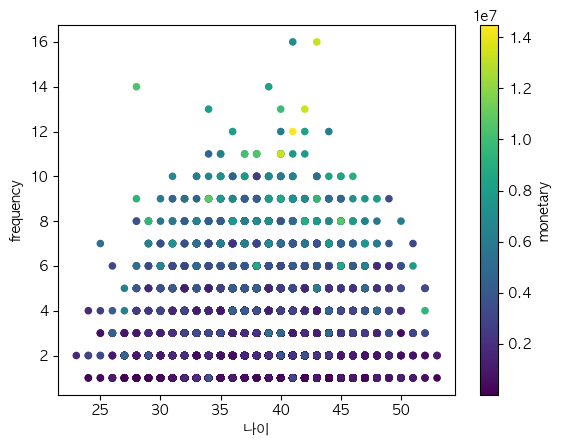

In [19]:
#데이터 시각화하기
customer_data.plot(x = "나이", y = "frequency", c = "monetary", kind = "scatter")
plt.show()

In [21]:
#skLearn
from sklearn.preprocessing import StandardScaler

In [22]:
from sklearn.cluster import KMeans

In [23]:
target_data = customer_data[["나이", "frequency", "monetary", "recency"]]

In [24]:
target_data

,나이,frequency,monetary,recency
0,44,6.0,2916059.0,125.0
1,36,2.0,105451.0,55.0
2,41,3.0,3743410.0,106.0
3,38,2.0,612902.0,30.0
4,40,3.0,3243852.0,123.0
...,...,...,...,...
31761,43,1.0,926550.0,2.0
31762,37,1.0,411248.0,2.0
31763,36,2.0,514023.0,2.0
31764,50,2.0,487825.0,1.0


In [25]:
scaler = StandardScaler()

In [27]:
scaler.fit(target_data)

StandardScaler()

In [28]:
target_data_scaled = scaler.transform(target_data)

In [29]:
target_data_scaled

array([[ 1.40918025,  2.10446263,  0.62517469,  0.28169439],
       [-0.64591202, -0.32310509, -0.99544454, -0.72840576],
       [ 0.63852065,  0.28378684,  1.10223194,  0.00752435],
       ...,
       [-0.64591202, -0.32310509, -0.75985863, -1.49319588],
       [ 2.95049945, -0.32310509, -0.77496461, -1.50762588],
       [ 0.38163411, -0.92999702, -0.90893719, -1.50762588]])

In [30]:
target_data_scaled = pd.DataFrame(target_data_scaled, columns = ["나이", "frequency", "monetary", "recency"])

In [31]:
target_data_scaled

,나이,frequency,monetary,recency
0,1.409180,2.104463,0.625175,0.281694
1,-0.645912,-0.323105,-0.995445,-0.728406
2,0.638521,0.283787,1.102232,0.007524
3,-0.132139,-0.323105,-0.702844,-1.089156
4,0.381634,0.283787,0.814183,0.252834
...,...,...,...,...
31761,1.152294,-0.929997,-0.521992,-1.493196
31762,-0.389025,-0.929997,-0.819120,-1.493196
31763,-0.645912,-0.323105,-0.759859,-1.493196
31764,2.950499,-0.323105,-0.774965,-1.507626


In [32]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state = 106)
kmeans.fit(target_data_scaled)

KMeans(n_clusters=3, random_state=106)

In [33]:
kmeans

KMeans(n_clusters=3, random_state=106)

In [34]:
kmeans.labels_

array([2, 0, 2, ..., 0, 1, 0], dtype=int32)

In [35]:
target_data_scaled["cluster"] = kmeans.labels_

In [36]:
target_data_scaled.head()

,나이,frequency,monetary,recency,cluster
0,1.409180,2.104463,0.625175,0.281694,2
1,-0.645912,-0.323105,-0.995445,-0.728406,0
2,0.638521,0.283787,1.102232,0.007524,2
3,-0.132139,-0.323105,-0.702844,-1.089156,0
4,0.381634,0.283787,0.814183,0.252834,1


In [37]:
target_data_scaled["cluster"].value_counts()

cluster
1    12662
0    12133
2     6971
Name: count, dtype: int64

In [ ]:
#나이, recency, frequency, monetary
#2개 x,y 표현
#PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)

In [40]:
pca_transformed = pca.fit_transform(target_data_scaled)

In [41]:
pca_transformed

array([[ 2.26176716,  1.31367238],
       [-1.04372944, -0.86410023],
       [ 1.39464341,  0.74823379],
       ...,
       [-0.70868567, -1.10341716],
       [ 0.12949597,  2.41058161],
       [-1.04769222, -0.08455304]])

In [42]:
target_data_scaled["pca_x"] = pca_transformed[:,0]
target_data_scaled["pca_y"] = pca_transformed[:,1]

In [43]:
target_data_scaled

,나이,frequency,monetary,recency,cluster,pca_x,pca_y
0,1.409180,2.104463,0.625175,0.281694,2,2.261767,1.313672
1,-0.645912,-0.323105,-0.995445,-0.728406,0,-1.043729,-0.864100
2,0.638521,0.283787,1.102232,0.007524,2,1.394643,0.748234
3,-0.132139,-0.323105,-0.702844,-1.089156,0,-0.711805,-0.539029
4,0.381634,0.283787,0.814183,0.252834,1,0.723073,0.322212
...,...,...,...,...,...,...,...
31761,1.152294,-0.929997,-0.521992,-1.493196,1,-0.317595,0.861010
31762,-0.389025,-0.929997,-0.819120,-1.493196,0,-1.090926,-0.780850
31763,-0.645912,-0.323105,-0.759859,-1.493196,0,-0.708686,-1.103417
31764,2.950499,-0.323105,-0.774965,-1.507626,1,0.129496,2.410582


In [46]:
ind_0 = target_data_scaled[target_data_scaled["cluster"]==0].index
ind_1 = target_data_scaled[target_data_scaled["cluster"]==1].index
ind_2 = target_data_scaled[target_data_scaled["cluster"]==2].index

/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


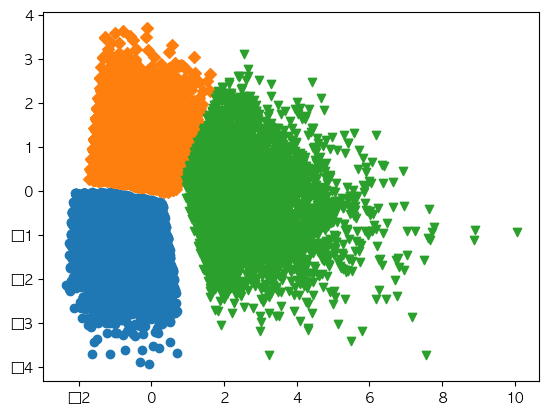

In [47]:
plt.scatter(x=target_data_scaled.loc[ind_0, "pca_x"], y=target_data_scaled.loc[ind_0, "pca_y"], marker='o')
plt.scatter(x=target_data_scaled.loc[ind_1, "pca_x"], y=target_data_scaled.loc[ind_1, "pca_y"], marker='D')
plt.scatter(x=target_data_scaled.loc[ind_2, "pca_x"], y=target_data_scaled.loc[ind_2, "pca_y"], marker='v')
plt.show()

In [49]:
target_data.loc[ind_0, "cluster"] =0
target_data.loc[ind_1, "cluster"] =1
target_data.loc[ind_2, "cluster"] =2

/var/folders/7q/vqvyxgf9317d2xvdsf_yrcsm0000gn/T/ipykernel_5343/4193498585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data.loc[ind_0, "cluster"] =0


In [50]:
target_data.groupby("cluster").agg({"나이":"mean", "frequency" : "mean", "monetary" : "mean", "recency":"mean"})

,나이,frequency,monetary,recency
cluster,,,,
0.0,35.342537,1.960521,1.202531e+06,97.078052
1.0,41.444795,1.813063,1.128490e+06,131.299163
2.0,38.712236,4.834314,4.204661e+06,73.199541


In [51]:
#실루엣 계수
from sklearn.metrics import silhouette_score
average_score = silhouette_score(target_data_scaled, target_data_scaled["cluster"])

In [52]:
average_score

0.34803344241346584

In [53]:
#DBSCAN
target_data_scaled_dbscan = target_data_scaled[["나이", "frequency", "monetary", "recency"]]

In [54]:
target_data_scaled_dbscan

,나이,frequency,monetary,recency
0,1.409180,2.104463,0.625175,0.281694
1,-0.645912,-0.323105,-0.995445,-0.728406
2,0.638521,0.283787,1.102232,0.007524
3,-0.132139,-0.323105,-0.702844,-1.089156
4,0.381634,0.283787,0.814183,0.252834
...,...,...,...,...
31761,1.152294,-0.929997,-0.521992,-1.493196
31762,-0.389025,-0.929997,-0.819120,-1.493196
31763,-0.645912,-0.323105,-0.759859,-1.493196
31764,2.950499,-0.323105,-0.774965,-1.507626


In [55]:
from sklearn.cluster import DBSCAN

In [56]:
dbscan = DBSCAN(eps=0.3, min_samples=100)
dbscan.fit(target_data_scaled_dbscan)
target_data_scaled_dbscan["cluster"] = dbscan.fit_predict(target_data_scaled_dbscan)

/var/folders/7q/vqvyxgf9317d2xvdsf_yrcsm0000gn/T/ipykernel_5343/2336352826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data_scaled_dbscan["cluster"] = dbscan.fit_predict(target_data_scaled_dbscan)


In [58]:
target_data_scaled_dbscan["cluster"].value_counts()

cluster
-1    23814
 1     6929
 0      772
 2      251
Name: count, dtype: int64

/var/folders/7q/vqvyxgf9317d2xvdsf_yrcsm0000gn/T/ipykernel_5343/2990105245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data_scaled_dbscan["pca_x"] = pca_transformed[:,0]
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


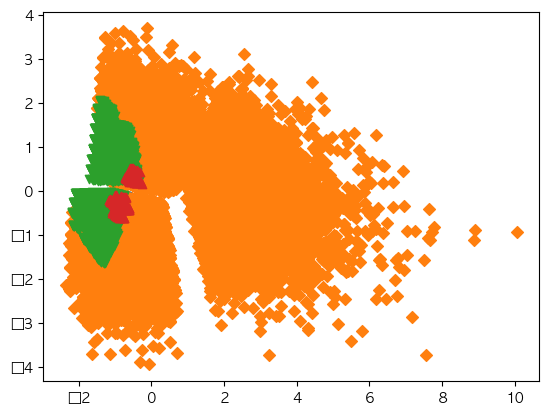

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(target_data_scaled_dbscan)


target_data_scaled_dbscan["pca_x"] = pca_transformed[:,0]
target_data_scaled_dbscan["pca_y"] = pca_transformed[:,1]

ind_0 = target_data_scaled_dbscan[target_data_scaled_dbscan["cluster"]==0].index
ind_1 = target_data_scaled_dbscan[target_data_scaled_dbscan["cluster"]==-1].index
ind_2 = target_data_scaled_dbscan[target_data_scaled_dbscan["cluster"]==1].index
ind_3 = target_data_scaled_dbscan[target_data_scaled_dbscan["cluster"]==2].index

plt.scatter(x=target_data_scaled.loc[ind_0, "pca_x"], y=target_data_scaled.loc[ind_0, "pca_y"], marker='o')
plt.scatter(x=target_data_scaled.loc[ind_1, "pca_x"], y=target_data_scaled.loc[ind_1, "pca_y"], marker='D')
plt.scatter(x=target_data_scaled.loc[ind_2, "pca_x"], y=target_data_scaled.loc[ind_2, "pca_y"], marker='v')
plt.scatter(x=target_data_scaled.loc[ind_3, "pca_x"], y=target_data_scaled.loc[ind_3, "pca_y"], marker='^')
plt.show()

In [60]:
from sklearn.metrics import silhouette_score
average_score = silhouette_score(target_data_scaled_dbscan, target_data_scaled["cluster"])

In [61]:
target_data_scaled_dbscan[target_data_scaled_dbscan["cluster"]==2]

,나이,frequency,monetary,recency,cluster,pca_x,pca_y
26,-0.132139,-0.323105,-0.930710,-0.497526,2,-1.655060,0.003536
159,-0.132139,-0.323105,-0.554273,-0.021336,2,-1.551273,-0.053194
336,-0.132139,-0.323105,-0.333639,-0.511956,2,-1.286959,-0.006566
350,0.124748,-0.323105,-0.704440,0.021954,2,-1.655151,0.200596
353,0.124748,-0.323105,-0.930530,-0.454236,2,-1.667208,0.254406
...,...,...,...,...,...,...,...
31281,-0.132139,-0.323105,-0.597872,-0.295506,2,-1.505394,-0.023895
31299,-0.132139,-0.323105,-0.386504,-0.309936,2,-1.372619,-0.026504
31316,0.124748,-0.323105,-0.921153,-0.425376,2,-1.669116,0.251228
31405,-0.389025,-0.323105,-0.530503,-0.497526,2,-1.410071,-0.259604
